1 . Import Libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math, copy

2 . Load Dataset

In [33]:
df = pd.read_csv("../data/Linear Regression.csv", delimiter = ",", header = 0)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [34]:
df.shape

(1338, 7)

3 . Checking Null Values

In [35]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [36]:
df1 = df
for i in range(len(df1.columns)):   
    print(df1.columns[i])
    

age
sex
bmi
children
smoker
region
charges


# Preprocessing

In [37]:
df1.smoker.replace(('yes', 'no'), (1, 0), inplace=True)
df1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350
1336,21,female,25.800,0,0,southwest,2007.94500


In [38]:
df1.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [39]:
df1.region.replace(('southwest', 'southeast', 'northwest', 'northeast'), (0, 1, 2, 3), inplace=True)
df1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,0,16884.92400
1,18,male,33.770,1,0,1,1725.55230
2,28,male,33.000,3,0,1,4449.46200
3,33,male,22.705,0,0,2,21984.47061
4,32,male,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,2,10600.54830
1334,18,female,31.920,0,0,3,2205.98080
1335,18,female,36.850,0,0,1,1629.83350
1336,21,female,25.800,0,0,0,2007.94500


In [40]:
df1.sex.unique()

array(['female', 'male'], dtype=object)

In [49]:
df1.sex.replace(('female', 'male'), (1, 0), inplace=True)
df1

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,2,10600.54830
1334,18,1,31.920,0,0,3,2205.98080
1335,18,1,36.850,0,0,1,1629.83350
1336,21,1,25.800,0,0,0,2007.94500


In [50]:
df1.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,1.484305,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [51]:
Y = df1.charges
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [52]:
X = df1.drop("charges", axis = 1)
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,0
1,18,0,33.770,1,0,1
2,28,0,33.000,3,0,1
3,33,0,22.705,0,0,2
4,32,0,28.880,0,0,2
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,2
1334,18,1,31.920,0,0,3
1335,18,1,36.850,0,0,1
1336,21,1,25.800,0,0,0


In [53]:
X.shape

(1338, 6)

In [73]:
# X_train = np.array(X) 
# Y_train = np.array(Y)

In [74]:
# X_train

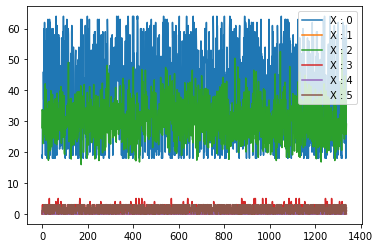

In [75]:
fig = plt.figure() 

# fig.set_size_inches(30, 10)

for i in range(len(X.columns)):
    plt.plot(X.iloc[:,i], linestyle='-', label = f"X : {i}")
    
plt.legend(loc='best')
plt.show()

In [76]:
Y_train

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

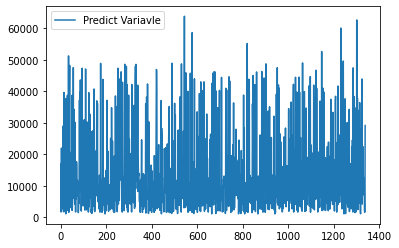

In [77]:
fig = plt.figure() 

# fig.set_size_inches(25, 10)
plt.plot(Y_train, linestyle='-', label = f"Predict Variavle")
plt.legend(loc='best')
plt.show()

In [78]:
X.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [79]:
from sklearn.linear_model import LinearRegression

linear_model1 = LinearRegression()
linear_model1.fit(X,Y)

LinearRegression()

In [80]:
print("Accuracy on training set:", linear_model1.score(X,Y))

Accuracy on training set: 0.7507372027994937
